# Data Analysis - Part 2

# 1. Contents
* [Data Analysis - Part 2](#Data_Analysis_Part_-_2)
    * [1. Contents](#1._Contents)
    * [2. NLP](#2._NLP)
        * [2a. Separate English and non-English blogs](#2a._Separate_English_and_non-English_blogs)
        * [2b. Language frequencies](#2b._Language_frequencies)
        * [2c. Adding sentiment analysis to DataFrame](#2c._Adding_sentiment_analysis_to_DataFrame)
        * [2d. Sentiment analysis by `gender`](#2d._Sentiment_analysis_by_`gender`)
        * [2e. Sentiment analysis by `age`](#2e._Sentiment_analysis_by_`age`)
        * [2f. Sentiment analysis by `industry`](#2f._Sentiment_analysis_by_`industry`)
        * [2g. Word cloud](#2g._Word_cloud)
        * [2h. Word clouds by `gender`](#2h._Word_clouds_by_`gender`)
        * [2i. Word clouds by `age`](#2i._Word_clouds_by_`age`)

# 2. NLP <a id='3.NLP'></a>

Naturally, some of the blogs in the dataset will **not be in the English language**. Since our DataFrame is large and no language detection package is 100% accurate, I will use a for loop to extract blogs that are possibly not in English, then look over them **manually to remove the actual foreign blogs**. 

### 2a. Separate English and non-English blogs

In [4]:
import pandas as pd

df = pd.read_csv('df.csv', index_col=0, parse_dates=['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598418 entries, 0 to 598417
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   id        598418 non-null  int64         
 1   gender    598418 non-null  object        
 2   age       598418 non-null  int64         
 3   industry  598418 non-null  object        
 4   sign      598418 non-null  object        
 5   date      598418 non-null  datetime64[ns]
 6   blog      598418 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 36.5+ MB


In [5]:
from tqdm import tqdm
import pycld2 as cld2

foreign_index = []
errors = []
i = 0

for blog in tqdm(df['blog'], position=0, leave=True):
    try:
        if cld2.detect(blog)[2][0][1] != 'en':
            foreign_index.append(i)
    except:
        errors.append(i)
    i += 1
    
len(foreign_index)

100%|███████████████████████████████████████████████████████████████████████| 598418/598418 [00:36<00:00, 16618.89it/s]


23490

In [6]:
foreign_blogs = []

for index in tqdm(foreign_index, position=0, leave=True):
    foreign_blogs.append(df['blog'][index])

len(foreign_blogs)

100%|█████████████████████████████████████████████████████████████████████████| 23490/23490 [00:00<00:00, 31898.76it/s]


23490

In [7]:
foreign_df_original = pd.DataFrame(
    {'index':foreign_index,
    'blog':foreign_blogs})

foreign_df_original = foreign_df_original.sort_values(by=['blog'])
foreign_df_original = foreign_df_original.reset_index(drop=True)
foreign_df_original.to_csv('foreign_df_original.csv')
foreign_df_original.head()

,index,blog
0,21957,! ! urlLink Zombie Beat urlLink Jesus ! !
1,414453,!!!! SCRAM !!!!
2,46518,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!SOFIA GOT ...
3,409799,!& traacks
4,421294,!@#$%^&*() 1234567890 qwertyuiopasdfghjklzxc...


In [8]:
languages = [cld2.detect(blog)[2][1][0] for blog in foreign_df_original['blog']]
foreign_df_original['language'] = languages

language_acronyms = [cld2.detect(blog)[2][0][1] for blog in foreign_df_original['blog']]
foreign_df_original['language acronyms'] = language_acronyms
foreign_df_original[foreign_df_original['language'] == 'ENGLISH']

,index,blog,language,language acronyms
10,563076,""" malapit na akong matunaw sa init ng iyong ul...",ENGLISH,tl
11,563042,""" nung pinyagan niya akong manligaw sa kanya ""...",ENGLISH,tl
21,333945,"""Define Platonic"" tanong sa akin ni Wilbert, ""...",ENGLISH,tl
48,327123,"""In de aanloop naar de zestigste verjaardag va...",ENGLISH,nl
61,160277,"""No happy moment is ever really gone if it lea...",ENGLISH,tl
...,...,...,...,...
22864,384514,yesterday was my 25th Birthday. on special occ...,ENGLISH,ms
22865,444458,yesterday. we had this speaker in soc sci 1. m...,ENGLISH,tl
22885,108558,yo espero que sabes que estas haciendo. porqu...,ENGLISH,es
23256,251066,"â€¦.last Thursday,naganap ung retreat namen ng...",ENGLISH,tl


With this DataFrame saved, I will manually comb through it and keep the blogs that were correctly identified as a foreign blog.

In [9]:
duplicate_list = [1093457,1093691,988941,2020102,2259125,3185649,3492164,3522219,3087742,3169212,1975546,589736,734562,
                  3383940,3397935,3406811,2876677,3088024,1107146,958176,2806788,731614,3568314,3686758,1618178,3346463,
                 3352192,3353160,3413707,3529406,3750778,3849840,3926400,3319669,3359278,3392873,4224880,1316855,1951423,
                 1944324,1967338,2033501,2046767,2087401,2134154,3211137,3885865,3908283,3935919,1799065,2862307,1794773,
                  3862547,2543884,3762737,2001162,2426419,2151828,2161435,3452960,3660330,3676363,3682952,3577043,3578628,
                 3588546,3610960,2200026,3486596,3183300,3839808,3856268,4115699,3516605,896120,4299910,4307329,3513465,
                 3514967,4110895,4112653,4113328,4122384]
keep_1_list = [2866266,2889082,1470319,1472995,1031806,1233897,1031806,1233897,1627387,3825788,3517276,3522724,3523319,3585348,
              2021701,3252533,2973911,700788,105748,108212,655250,3120307,3121569,1417798,1596188,4206717,4312497,2233272,
              2308025,1103016,3708279,3877377,3517276,461975,3853244,3855144,4144686,4153918,2565326,3636814,2942571,3432056,
              3912848,3918509,1966000,3325110,1971502,3687274,3689737,705633,894945,2753052,3076129,3971396,673093,2050704,
               2100992,3316539,3334256,3338115,1774151,2460557,1826527,1934430,2200026,271835,1500723,3785526,2560767,2562113,
              2996938,3921925,3569294,3569863,3570676,3362389,3373358,2539507,2608455,3603744,3555496,3572706,4056925,3320173,
              3337958,4111282,4112615,3988115,3992688,3994484,4018252,4139599,4165577,258556,899153,3465514,3474897]

duplicate_index = df[df['id'].isin(duplicate_list)][df[df['id'].isin(duplicate_list)].duplicated(keep=False, subset=['blog'])].index
keep_1_index = df[df['id'].isin(keep_1_list)][df[df['id'].isin(keep_1_list)].duplicated(keep='first', subset=['blog'])].index
df.shape

(598418, 7)

During my manual check on the DataFrame of foreign blogs, I found a lot of **duplicate blogs**. For the blogs made by *Male and Female bloggers*, I will **remove all the blogs**, as this will not help my gender-centered project. For the duplicate blogs made by bloggers of one gender, I will opt to **keep the first instance of these blogs**, as they still still be valid blogs of their gender.

In [10]:
df = df.drop(duplicate_index)

errors = []

for index in tqdm(keep_1_index, position=0, leave=True):
    try:
        df.drop(index)
    except:
        errors.append(index)
    
errors

100%|██████████████████████████████████████████████████████████████████████████████| 2113/2113 [03:08<00:00, 11.21it/s]


[159168, 159230, 159236, 160054]

In [11]:
df.shape, max(df.index)

((594292, 7), 598417)

In [12]:
# Import manually fixed DataFrame of foreign blogs

foreign_df_edited = pd.read_csv('foreign_df_edited.csv', index_col=0, error_bad_lines=False)
foreign_df_edited.shape

b'Skipping line 43: expected 3 fields, saw 5\nSkipping line 693: expected 3 fields, saw 5\nSkipping line 753: expected 3 fields, saw 5\nSkipping line 785: expected 3 fields, saw 5\nSkipping line 1712: expected 3 fields, saw 5\nSkipping line 2069: expected 3 fields, saw 5\n'


(9412, 2)

As we can see, many of the blogs marked *"foreign"* by my language detector were actually in English, so I had to remove them from the DataFrame. The final DataFrame of foreign blogs only has **9412 entries, almost 20,000 less entries than originally**.

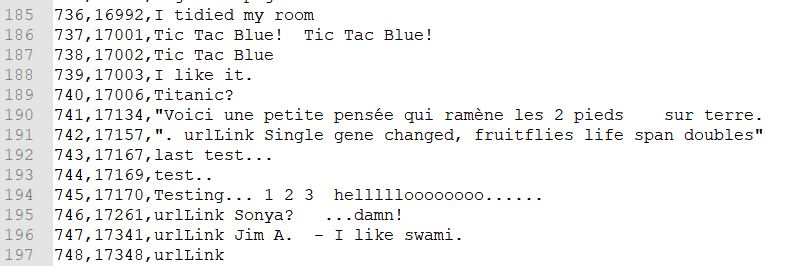

In [13]:
foreign_df_edited.head()

,index,blog
0,133729, s sad and lonely but it's ok cuz today is sh...
1,283913, second day of driver ed. It was insanely tor...
2,252094,MAYBE WE SHOULD ALL GET BREAST IMPLANTS I ad...
3,154797,Post. This is my blog. Yo. Yo. Kick it DJ...
4,21602,! ! urlLink Zombie Beat urlLink Jesus ! !


In [14]:
english_df = df[~df['blog'].isin(foreign_df_edited['blog'])]
df.shape

(594292, 7)

After removing all the blogs in our working DataFrame that are in the DataFrame of foreign blogs, I finally have a DataFrame with **all the English blogs in the Blog Authorship Corpus**, with the added benefit of less duplicates. After saving that, we can begin our **language analysis** on the DataFrame of foreign blogs.

In [15]:
english_df.to_csv('english_df.csv')

### 2b. Language frequencies

In [16]:
from collections import Counter

languages = []

for blog in tqdm(foreign_df_edited['blog'], position=0, leave=True):
    try:
        languages.append(cld2.detect(blog)[2][0][0])
    except:
        pass
    
language_counter_df = pd.DataFrame.from_dict(Counter(languages), orient='index').reset_index()
language_counter_df = language_counter_df.rename(columns = {'index':'languages', 0:'count'})
language_counter_df.head()

100%|███████████████████████████████████████████████████████████████████████████| 9412/9412 [00:00<00:00, 25272.49it/s]


,languages,count
0,Unknown,7166
1,TAGALOG,678
2,DUTCH,42
3,GERMAN,164
4,SPANISH,282


In [17]:
language_counter_df = language_counter_df.sort_values(by=['count'], ascending=False)
language_counter_df = language_counter_df.drop(language_counter_df[language_counter_df['languages'] == 'Unknown'].index)
language_counter_df = language_counter_df.reset_index(drop=True)
language_counter_df.head()

,languages,count
0,TAGALOG,678
1,SPANISH,282
2,INDONESIAN,244
3,MALAY,188
4,FRENCH,167


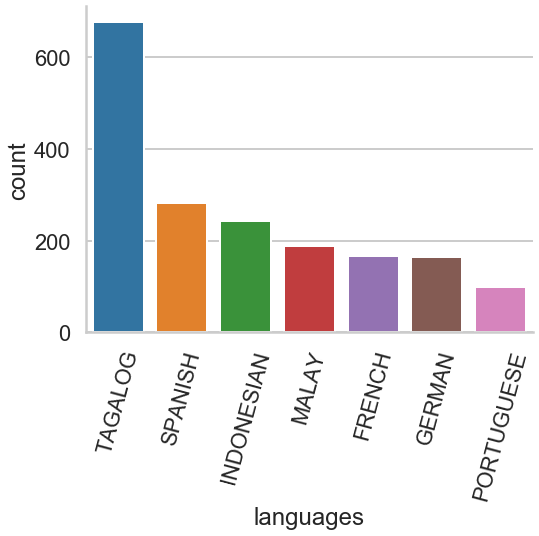

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
sns.set_context("poster")

fig, ax1 = plt.subplots(figsize=(8,6))

# Only extract languages with more than 100 blogs
sns.barplot(data=language_counter_df[language_counter_df['count'] >= 100], x='languages', y='count')
sns.despine(fig)
ax1 = ax1.set_xticklabels(ax1.get_xticklabels(), rotation=75)

It looks like **the most common language in our DataFrame was Tagalog**, with about **678 blogs** marked as this language. The **next most common languages were Spanish, Indonesian, Malay, and French**. It seems like blogspot.com was an *internationally used website*, although none of these languages were quite as common as English, which we have **hundreds of thousands of blogs in**.

### 2c. Adding sentiment analysis to DataFrame

Using the *nltk package* for Python, I will conduct **sentiment analysis** on the English blogs in my dataset. First, I will demonstrate its utility with an example.

In [19]:
df['blog'][1]

'My four-year old never stops talking.  She\'ll say "Mom?" and when I say "Yes?", she\'ll say "Ummm.... ummm... oh yeah.  Where do lady bugs hide in the rain?"  Anything to hear her own voice. Very, very exhausting.    Now I remember!  This is why I go to work!   *Sigh*'

In [20]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
scores = sia.polarity_scores(df['blog'][1])

scores

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yctaa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yctaa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


{'neg': 0.117, 'neu': 0.811, 'pos': 0.072, 'compound': -0.5026}

As we can see, the **compound rating given to this blog was -0.5026**, demonstrating a blog with a **moderately negative sentiment**. The compound rating ranges from -1 to +1, with -1 being absolutely negative, 0 being absolutely neutral, and -1 being absolutely positive. Although this package *has a little trouble with sarcasm and irony*, it should be accurate enough for my purposes.

In the following code, I will calculate the **compound sentiment scores** for each blog and add them to my DataFrame.

In [21]:
sentiment_scores = [sia.polarity_scores(blog)['compound'] for blog in tqdm(df['blog'], position=0, leave=True)]
df['sentiment score'] = sentiment_scores
df.head()

100%|█████████████████████████████████████████████████████████████████████████| 594292/594292 [33:51<00:00, 292.58it/s]


,id,gender,age,industry,sign,date,blog,sentiment score
0,1000331,female,37,Unknown,Leo,2004-05-31,"Well, everyone got up and going this morning. ...",0.8609
1,1000331,female,37,Unknown,Leo,2004-05-29,My four-year old never stops talking. She'll ...,-0.5026
2,1000331,female,37,Unknown,Leo,2004-05-28,"Actually it's not raining yet, but I bought 15...",0.9364
3,1000331,female,37,Unknown,Leo,2004-05-28,Ha! Just set up my RSS feed - that is so easy!...,0.3175
4,1000331,female,37,Unknown,Leo,2004-05-28,"Oh, which just reminded me, we were talking ab...",0.8379


### 2d. Sentiment analysis by `gender`

sentiment score                                                       
                 count      mean       std  min     25%      50%     75%  max
gender                                                                       
female        297538.0  0.368428  0.679621 -1.0  0.0000  0.68915  0.9593  1.0
male          296754.0  0.318913  0.667529 -1.0 -0.0772  0.55740  0.9325  1.0

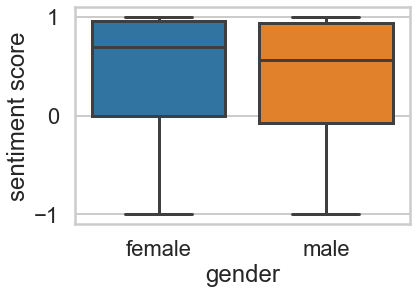

In [22]:
_ = sns.boxplot(data=df, x='gender', y='sentiment score')
df[['sentiment score', 'gender']].groupby('gender').describe()

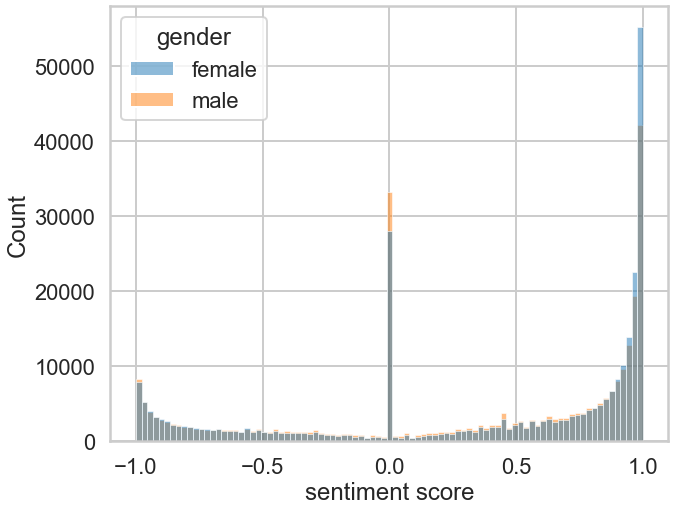

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))
_ = sns.histplot(ax=ax, data=df, x='sentiment score', hue='gender')

Looking at the tops of the bins, it looks like **most of the bins on the lower section have more male-written blogs**, while **the 5 most positive bins are dominated by female-written blogs**. The boxplots above also show that **female blogs had a higher mean sentiment score than male blogs**. A paired t-test should be able to determine whether this is a significant difference.

In [24]:
from scipy.stats import ttest_ind

female_ss = df[df['gender'] == 'female']['sentiment score']
male_ss = df[df['gender'] == 'male']['sentiment score']
ttest_ind(female_ss, male_ss, equal_var=False)

Ttest_indResult(statistic=28.334104367761146, pvalue=1.7242072911910846e-176)

Assuming our blogs are independent of each other, the chance of observing the difference in sentiment score between male and female bloggers that we observed is **almost zero**, supporting the alternate hypothesis that this difference is significant. As such, **there is evidence that female bloggers on blogger.com generally wrote more positive blogs than male bloggers**. This falls in line with a [Gallup poll analysis conducted in 2014](https://www.researchgate.net/publication/271621233_Are_Women_Happier_than_Men_Evidence_from_the_Gallup_World_Poll#:~:text=A%20Gallup%20World%20Poll%2Dbased,lower%20than%20that%20of%20men.), that found that women are generally happier than men.

### 2e. Sentiment analysis by `age`

To conduct sentiment analysis on my DataFrame by age, I must first **put every blog in a separate bin made of up different age ranges**.

In [25]:
import numpy as np

age_distribution = [age for age in df['age'].value_counts().index]
np.setdiff1d(list(range(13,48)),age_distribution)

array([18, 19, 20, 21, 22, 28, 29, 30, 31, 32])

Using this list of missing ages, I will create 3 bins, one for blogs written by users **below the age of 18**, one for blogs written by users **between 22-28**, and one for blogs written by users **over the age of 32**.

In [26]:
23 in range(22,28)

True

In [67]:
age_ranges = []

for age in df['age']:
    if age in range(0,18):
        age_ranges.append('13-18')
    elif age in range(22,28):
        age_ranges.append('22-28')
    elif age in range(32,100):
        age_ranges.append('32-48')

df['age range'] = age_ranges
df.head()

,id,gender,age,industry,sign,date,blog,age range
0,1000331,female,37,Unknown,Leo,2004-05-31,"Well, everyone got up and going this morning. ...",32-48
1,1000331,female,37,Unknown,Leo,2004-05-29,My four-year old never stops talking. She'll ...,32-48
2,1000331,female,37,Unknown,Leo,2004-05-28,"Actually it's not raining yet, but I bought 15...",32-48
3,1000331,female,37,Unknown,Leo,2004-05-28,Ha! Just set up my RSS feed - that is so easy!...,32-48
4,1000331,female,37,Unknown,Leo,2004-05-28,"Oh, which just reminded me, we were talking ab...",32-48


sentiment score                                                   \
                    count      mean       std  min    25%      50%     75%   
age range                                                                    
13-18            195951.0  0.331327  0.693331 -1.0 -0.168  0.63690  0.9512   
22-28            283184.0  0.355618  0.665960 -1.0  0.000  0.63675  0.9493   
32-48            115157.0  0.335462  0.659980 -1.0  0.000  0.58370  0.9372   

                
           max  
age range       
13-18      1.0  
22-28      1.0  
32-48      1.0

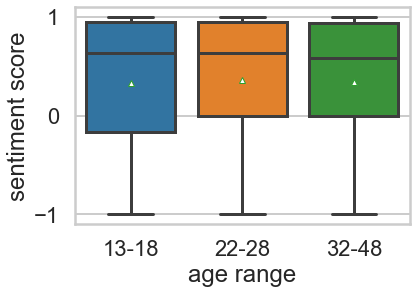

In [28]:
_ = sns.boxplot(data=df, x='age range', y='sentiment score', order=['13-18','22-28','32-48'], showmeans=True,
               meanprops={"markerfacecolor":"white"})
df[['sentiment score', 'age range']].groupby('age range').describe()

As we can see, the **different age ranges also have different means** in sentiment scores. A *paired t-test* between the different age ranges should let us know whether the differences are significant.

In [29]:
teen_ss = df[df['age range'] == '13-18']['sentiment score']
young_ss = df[df['age range'] == '22-28']['sentiment score']
ttest_ind(teen_ss, young_ss, equal_var=False)

Ttest_indResult(statistic=-12.11619782841375, pvalue=8.784955465098785e-34)

In [30]:
teen_ss = df[df['age range'] == '13-18']['sentiment score']
old_ss = df[df['age range'] == '32-48']['sentiment score']
ttest_ind(teen_ss, old_ss, equal_var=False)

Ttest_indResult(statistic=-1.6557888841478918, pvalue=0.09776583002860907)

Once again, there is a **significant difference in sentiment scores between blogs written by users who are 13-18 and blogs written by users who are 22-28**. However, there is **no significant difference in sentiment scores between the youngest and oldest bloggers**. This runs counter to conventional research that has found that people get happier as they age.

### 2f. Sentiment analysis by `industry`

Since there are so many industries in our DataFrame, I will extract the **2 industries with the largest different in mean sentiment scores**, then visualize and analyze them.

In [31]:
df[['sentiment score', 'industry']].groupby('industry').mean().sort_values('sentiment score')

,sentiment score
industry,
Maritime,0.219862
Automotive,0.240043
Military,0.267979
Law,0.270197
Architecture,0.294751
Chemicals,0.299777
Construction,0.314413
Biotech,0.319178
InvestmentBanking,0.321555


The 2 most different industries in terms of sentiment analysis are *'Maritime'* and *'Marketing'*. I will now visualize and analyze these 2 industries by sentiment.

sentiment score                                               \
                    count      mean       std     min     25%      50%   
industry                                                                 
Maritime            269.0  0.219862  0.748647 -0.9996 -0.5635  0.51060   
Marketing          3490.0  0.489664  0.618039 -0.9985  0.0000  0.82445   

                             
                75%     max  
industry                     
Maritime   0.930900  0.9994  
Marketing  0.975275  0.9999

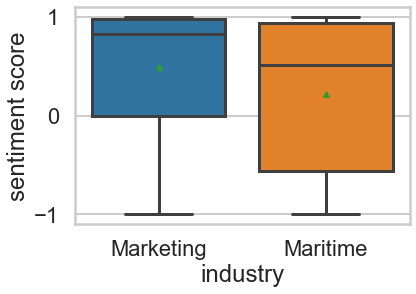

In [32]:
_ = sns.boxplot(data=df[df['industry'].isin(['Maritime','Marketing'])], x='industry', y='sentiment score', showmeans=True)
df.loc[df['industry'].isin(['Maritime','Marketing']), ['sentiment score', 'industry']].groupby('industry').describe()

In [33]:
marketing_ss = df[df['industry'] == 'Marketing']['sentiment score']
maritime_ss = df[df['industry'] == 'Maritime']['sentiment score']
ttest_ind(marketing_ss, maritime_ss, equal_var=False)

Ttest_indResult(statistic=5.761379019069739, pvalue=2.086049933108616e-08)

Using a boxplot and paired t-test, we can see that **blogs written by marketers were significantly more positive than blogs written by maritime workers**. As a result, we can conclude that there is evidence to support that **some industries produced more significantly positive bloggers than others**. 

### 2g. Word Cloud

In [46]:
from wordcloud import WordCloud
from collections import Counter

wc = WordCloud()

counts_all = Counter()

for blog in tqdm(df['blog'], position=0, leave=True):
    counts_line = wc.process_text(blog)
    counts_all.update(counts_line)

wc.generate_from_frequencies(counts_all)
wc.to_file('word cloud.png')

100%|█████████████████████████████████████████████████████████████████████████| 598418/598418 [11:24<00:00, 874.69it/s]


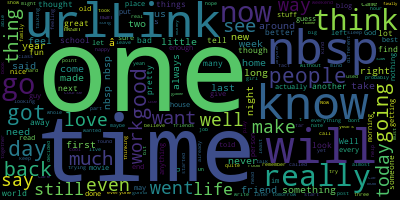

From our general word cloud, we can see that **the most common words used were fairly simple**, which was expected given the informal nature of blogs.

### 2h. Word clouds by `gender`

In [64]:
wc = WordCloud()

male_counts_all = Counter()

for blog in tqdm(df[df['gender'] == 'male']['blog'], position=0, leave=True):
    counts_line = wc.process_text(blog)
    male_counts_all.update(counts_line)

ignore = ['nbsp','urlLink']
for word in list(male_counts_all):
    if word in ignore:
        del male_counts_all[word]

wc.generate_from_frequencies(male_counts_all)
wc.to_file('male word cloud.png')

100%|█████████████████████████████████████████████████████████████████████████| 298673/298673 [05:36<00:00, 887.52it/s]


In [65]:
wc = WordCloud()

female_counts_all = Counter()

for blog in tqdm(df[df['gender'] == 'female']['blog'], position=0, leave=True):
    counts_line = wc.process_text(blog)
    female_counts_all.update(counts_line)

ignore = ['nbsp','urlLink']    
for word in list(female_counts_all):
    if word in ignore:
        del female_counts_all[word]

wc.generate_from_frequencies(female_counts_all)
wc.to_file('female word cloud.png')

100%|█████████████████████████████████████████████████████████████████████████| 299745/299745 [05:50<00:00, 854.96it/s]


**Male word cloud**

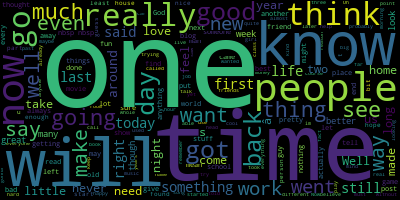

**Female word cloud**

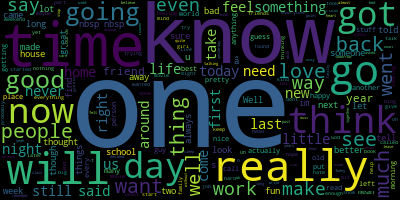

### 2i. Word clouds by age

In [72]:
wc = WordCloud()

teen_counts_all = Counter()

for blog in tqdm(df[df['age range'] == '13-18']['blog'], position=0, leave=True):
    counts_line = wc.process_text(blog)
    teen_counts_all.update(counts_line)

ignore = ['nbsp','urlLink']
for word in list(teen_counts_all):
    if word in ignore:
        del teen_counts_all[word]

wc.generate_from_frequencies(teen_counts_all)
wc.to_file('teen word cloud.png')

100%|█████████████████████████████████████████████████████████████████████████| 197837/197837 [03:30<00:00, 939.11it/s]


In [73]:
wc = WordCloud()

young_counts_all = Counter()

for blog in tqdm(df[df['age range'] == '22-28']['blog'], position=0, leave=True):
    counts_line = wc.process_text(blog)
    young_counts_all.update(counts_line)

ignore = ['nbsp','urlLink']
for word in list(young_counts_all):
    if word in ignore:
        del young_counts_all[word]

wc.generate_from_frequencies(young_counts_all)
wc.to_file('young word cloud.png')

100%|█████████████████████████████████████████████████████████████████████████| 284812/284812 [05:08<00:00, 922.69it/s]


In [74]:
wc = WordCloud()

old_counts_all = Counter()

for blog in tqdm(df[df['age range'] == '32-48']['blog'], position=0, leave=True):
    counts_line = wc.process_text(blog)
    old_counts_all.update(counts_line)

ignore = ['nbsp','urlLink']
for word in list(old_counts_all):
    if word in ignore:
        del old_counts_all[word]

wc.generate_from_frequencies(old_counts_all)
wc.to_file('old word cloud.png')

100%|█████████████████████████████████████████████████████████████████████████| 115769/115769 [02:08<00:00, 897.68it/s]


**Teen word cloud**

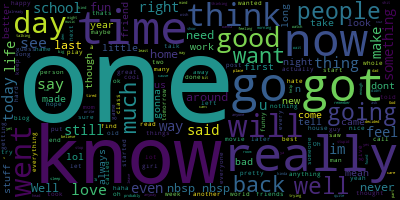

**Young word cloud**

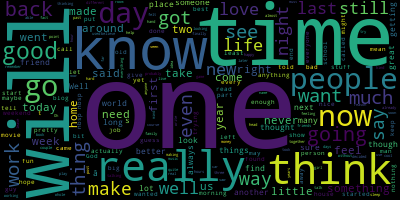

**Old word cloud**

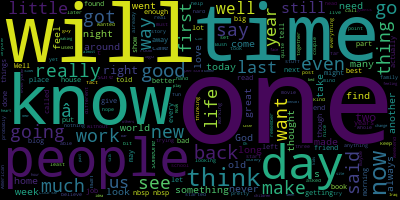

The word clouds of different ages and genders do not reveal much information, which **probably means that the same common words are being used by all bloggers**.